In [33]:
import h5py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from __future__ import print_function
from matplotlib import pyplot as plt

In [34]:


# Fonction pour récuperer les signaux noise et attribuer des target =1 

def load_noise_dataset(filename):
    with h5py.File(filename, 'r') as f:
        if 'data' in f:
            data = f['data']
            if isinstance(data, h5py.Dataset):
                print("Type du dataset 'data':", type(data))
                print("Forme du dataset 'data':", data.shape)
                data_matrix = data[:]  
                print("Matrice de données:", data_matrix)
                return data_matrix
            elif isinstance(data, h5py.Group):
                print("'data' est un groupe. Voici ses éléments :")
                noise_matrices = []
                trace_names = []
                for key in data.keys():
                    dataset = data[key]
                    if isinstance(dataset, h5py.Dataset):
                        # Calculer la moyenne des trois canaux pour chaque signal
                        data_matrix = np.mean(dataset[:], axis=0)
                        noise_matrices.append(data_matrix)
                        trace_names.append(key)
                if noise_matrices:
                    stacked_data_matrix = np.vstack(noise_matrices)
                    df_noise = pd.DataFrame(stacked_data_matrix)
                    df_noise['trace_name'] = trace_names
                    #print("DataFrame créé avec succès :", df_noise)
                    return df_noise
                

# Utilisation de la fonction pour charger et convertir le dataset à partir du fichier HDF5
filename = 'Instance_noise_1k.hdf5'
df_noise = load_noise_dataset(filename)

# Ajouter une colonne 'source_type' avec des valeurs constantes de 2
df_noise['source_type'] = 1
print(df_noise)
"""
# Liste des colonnes dont vous avez besoin
colonnes_a_recuperer = ['source_latitude_deg','source_longitude_deg','source_depth_km',
                        'source_magnitude','source_magnitude_type','path_ep_distance_km',
                        'path_hyp_distance_km','path_backazimuth_deg']

# Supprimer les espaces à la fin des noms de colonnes
df_csv.columns = df_csv.columns.str.strip()

# Sélectionner les colonnes spécifiques à partir du DataFrame
colonnes_filtrées = df_csv[colonnes_a_recuperer]

# Concaténer les colonnes filtrées avec les colonnes de votre base de données
donnees_concatenees = pd.concat([df, colonnes_filtrées], axis=1)
len(donnees_concatenees)

# Afficher les données concaténées de la ligne 900 à la ligne 20000
print(donnees_concatenees)
"""

'data' est un groupe. Voici ses éléments :
              0           1           2           3           4           5  \
0    -38.333333  -47.333333  -53.333333  -45.333333  -35.000000  -32.000000   
1     47.333333  109.333333   23.333333  -49.000000   13.000000  -37.000000   
2     -6.666667   -7.000000   -7.000000   -5.666667   -5.000000   -2.666667   
3     82.333333   79.666667   78.000000   81.333333   83.666667   77.666667   
4    -71.000000  -70.000000  -69.000000  -66.666667  -65.000000  -67.666667   
..          ...         ...         ...         ...         ...         ...   
995 -254.333333 -238.333333 -262.000000 -268.666667 -244.000000 -264.000000   
996    2.000000   -5.666667    1.666667   -0.666667   -1.666667   -2.000000   
997   -2.000000   -1.000000    0.333333    2.000000   -1.666667   -0.666667   
998   -2.333333    0.000000  -10.000000   -0.666667   -0.333333   -7.666667   
999   40.666667   -0.666667   16.000000   39.000000    5.666667  -28.333333   

        

"\n# Liste des colonnes dont vous avez besoin\ncolonnes_a_recuperer = ['source_latitude_deg','source_longitude_deg','source_depth_km',\n                        'source_magnitude','source_magnitude_type','path_ep_distance_km',\n                        'path_hyp_distance_km','path_backazimuth_deg']\n\n# Supprimer les espaces à la fin des noms de colonnes\ndf_csv.columns = df_csv.columns.str.strip()\n\n# Sélectionner les colonnes spécifiques à partir du DataFrame\ncolonnes_filtrées = df_csv[colonnes_a_recuperer]\n\n# Concaténer les colonnes filtrées avec les colonnes de votre base de données\ndonnees_concatenees = pd.concat([df, colonnes_filtrées], axis=1)\nlen(donnees_concatenees)\n\n# Afficher les données concaténées de la ligne 900 à la ligne 20000\nprint(donnees_concatenees)\n"

In [35]:
# Fonction pour récuperer les signaux earthquake et attribuer des target =0

def load_and_convert_hdf5_dataset(filename):
    with h5py.File(filename, 'r') as f:
        if 'data' in f:
            data = f['data']
            if isinstance(data, h5py.Dataset):
                print("Type du dataset 'data':", type(data))
                print("Forme du dataset 'data':", data.shape)
                data_matrix = data[:]  
                print("Matrice de données:", data_matrix)
                return data_matrix
            elif isinstance(data, h5py.Group):
                print("'data' est un groupe. Voici ses éléments :")
                data_matrices = []
                trace_names = []
                for key in data.keys():
                    dataset = data[key]
                    if isinstance(dataset, h5py.Dataset):
                        # Calculer la moyenne des trois canaux pour chaque signal
                        data_matrix = np.mean(dataset[:], axis=0)
                        data_matrices.append(data_matrix)
                        trace_names.append(key)
                if data_matrices:
                    stacked_data_matrix = np.vstack(data_matrices)
                    df = pd.DataFrame(stacked_data_matrix)
                    df['trace_name'] = trace_names
                    #print("DataFrame créé avec succès :", df)
                    return df
               
# Utilisation de la fonction pour charger et convertir le dataset à partir du fichier HDF5
filename = 'Instance_events_counts_10k.hdf5'
df = load_and_convert_hdf5_dataset(filename)

# Spécifier le chemin complet vers le fichier CSV
csv_file = 'metadata_Instance_events_10k.csv'

# Lecture du fichier CSV contenant les informations sur la base de données des signaux
df_csv = pd.read_csv(csv_file)
len (df)
df['source_type'] = 0
print(df)
"""
# Liste des colonnes dont vous avez besoin
colonnes_a_recuperer = ['source_latitude_deg', 'source_longitude_deg', 'source_depth_km',
                        'source_magnitude', 'source_magnitude_type', 'path_ep_distance_km',
                        'path_hyp_distance_km', 'path_backazimuth_deg']

# Supprimer les espaces à la fin des noms de colonnes
df_csv.columns = df_csv.columns.str.strip()

# Sélectionner les colonnes spécifiques à partir du DataFrame
colonnes_filtrées = df_csv[colonnes_a_recuperer]

# Concaténer les colonnes filtrées avec les colonnes de votre base de données
donnees_concatenees = pd.concat([df, colonnes_filtrées], axis=1)
len(donnees_concatenees)

# Afficher les données concaténées de la ligne 900 à la ligne 20000
print(donnees_concatenees)
"""



'data' est un groupe. Voici ses éléments :
               0           1           2           3           4           5  \
0     184.666667  196.000000  183.666667  180.333333  164.666667  162.666667   
1      12.000000   -7.000000   -7.666667    7.000000   20.666667   22.666667   
2       2.333333   -1.333333    0.333333   -0.333333    1.666667    1.000000   
3       2.666667   13.333333    1.666667   -2.666667    0.000000   -6.333333   
4      -3.000000    2.000000   -1.000000    0.333333    0.666667    0.666667   
...          ...         ...         ...         ...         ...         ...   
9995   36.000000   37.333333   22.666667   34.000000   39.000000   31.333333   
9996  -82.000000  -91.333333  -95.333333 -113.000000  -96.000000  -94.666667   
9997   -9.333333    1.333333    4.000000   -0.333333   -1.666667    0.333333   
9998   19.333333   22.000000   24.333333   29.333333   34.666667   35.000000   
9999    0.000000    0.333333    0.333333    0.333333    0.333333    0.666667 

"\n# Liste des colonnes dont vous avez besoin\ncolonnes_a_recuperer = ['source_latitude_deg', 'source_longitude_deg', 'source_depth_km',\n                        'source_magnitude', 'source_magnitude_type', 'path_ep_distance_km',\n                        'path_hyp_distance_km', 'path_backazimuth_deg']\n\n# Supprimer les espaces à la fin des noms de colonnes\ndf_csv.columns = df_csv.columns.str.strip()\n\n# Sélectionner les colonnes spécifiques à partir du DataFrame\ncolonnes_filtrées = df_csv[colonnes_a_recuperer]\n\n# Concaténer les colonnes filtrées avec les colonnes de votre base de données\ndonnees_concatenees = pd.concat([df, colonnes_filtrées], axis=1)\nlen(donnees_concatenees)\n\n# Afficher les données concaténées de la ligne 900 à la ligne 20000\nprint(donnees_concatenees)\n"

In [36]:
# Préparation des données d'entrainement, validation et de tests

# Diviser les données de bruit en ensemble d'entraînement et ensemble de test
df_noise_train1, df_noise_test = train_test_split(df_noise, test_size=0.2, random_state=42)

# Diviser l'ensemble d'entraînement en ensemble d'entraînement et ensemble de validation
df_noise_train, df_noise_validation = train_test_split(df_noise_train1, test_size=0.25, random_state=42)

# Diviser les données de seisme en ensemble d'entraînement, de test et de validation
df_train1, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_validation = train_test_split(df_train1, test_size=0.25, random_state=42)

# Concaténer df_noise_train avec df_train
df_train_concat = pd.concat([df_train, df_noise_train], ignore_index=True)

# Concaténer df_noise_test avec df_test
df_test_concat = pd.concat([df_test, df_noise_test], ignore_index=True)
#print (df_test_concat)
# Concaténer df_noise_validation avec df_validation
df_val_concat = pd.concat([df_validation, df_noise_validation], ignore_index=True)

# Afficher les dimensions des ensembles de données concaténés
print("Taille de l'ensemble d'entraînement concaténé :", len(df_train_concat))
print("Taille de l'ensemble de test concaténé :", len(df_test_concat))
print("Taille de l'ensemble de validation concaténé :", len(df_val_concat))


# Créer un objet de normalisation
scaler = StandardScaler()

# Sélectionner toutes les colonnes sauf les deux dernières
df_train_features = df_train_concat.iloc[:, :-2]
df_test_features = df_test_concat.iloc[:, :-2]
df_val_features = df_val_concat.iloc[:, :-2]

# Normaliser les colonnes sélectionnées
df_train_normalized_features = scaler.fit_transform(df_train_features)
df_test_normalized_features = scaler.transform(df_test_features)
df_val_normalized_features = scaler.transform(df_val_features)

"""
# Concaténer les colonnes normalisées avec les deux dernières colonnes non normalisées
df_train_normalized = pd.concat([pd.DataFrame(df_train_normalized_features, columns=df_train_features.columns), df_train_concat.iloc[:, -2:]], axis=1)
df_test_normalized = pd.concat([pd.DataFrame(df_test_normalized_features, columns=df_test_features.columns), df_test_concat.iloc[:, -2:]], axis=1)
df_val_normalized = pd.concat([pd.DataFrame(df_val_normalized_features, columns=df_val_features.columns), df_val_concat.iloc[:, -2:]], axis=1)
"""
# Afficher les statistiques de normalisation de l'ensemble d'entraînement
#print(df_train_normalized)

# Convertir les données normalisées en DataFrames pandas avec les index et colonnes d'origine
df_train_normalized = pd.DataFrame(df_train_normalized_features, index=df_train_concat.index, columns=df_train_features.columns)
df_test_normalized = pd.DataFrame(df_test_normalized_features, index=df_test_concat.index, columns=df_test_features.columns)
df_val_normalized = pd.DataFrame(df_val_normalized_features, index=df_val_concat.index, columns=df_val_features.columns)

# Afficher les DataFrames normalisés
print("Données d'entraînement normalisées :")
print(df_train_normalized)
print("\nDonnées de test normalisées :")
print(df_test_normalized)
print("\nDonnées de validation normalisées :")
print(df_val_normalized)








Taille de l'ensemble d'entraînement concaténé : 6600
Taille de l'ensemble de test concaténé : 2200
Taille de l'ensemble de validation concaténé : 2200
Données d'entraînement normalisées :
         0         1         2         3         4         5         6      \
0    -0.017389 -0.017399 -0.015380 -0.013562 -0.013416 -0.013094 -0.012428   
1    -0.043345 -0.028113 -0.007944  0.003453 -0.020869 -0.020653 -0.005629   
2    -0.015752 -0.015862 -0.014554 -0.013202 -0.013120 -0.012020 -0.011015   
3    -0.016912 -0.016880 -0.015126 -0.013541 -0.013332 -0.012588 -0.011742   
4    -0.015773 -0.015800 -0.014130 -0.012757 -0.012845 -0.011746 -0.010620   
...        ...       ...       ...       ...       ...       ...       ...   
6595 -0.044505 -0.043873 -0.042538 -0.040367 -0.039351 -0.037518 -0.035425   
6596 -0.016084 -0.015842 -0.014193 -0.012778 -0.012824 -0.011683 -0.010703   
6597 -0.016788 -0.016610 -0.014596 -0.012566 -0.012675 -0.011704 -0.010744   
6598 -0.017699 -0.024459 -0.0222




Epoch 1/10


53/53 [==============================] - 17s 291ms/step - loss: -99.3860 - accuracy: 0.9038 - val_loss: -306.9838 - val_accuracy: 0.9091
Epoch 2/10
53/53 [==============================] - 15s 281ms/step - loss: -1082.2046 - accuracy: 0.9091 - val_loss: -2388.3882 - val_accuracy: 0.9091
Epoch 3/10
53/53 [==============================] - 15s 289ms/step - loss: -5447.2295 - accuracy: 0.9091 - val_loss: -9481.9062 - val_accuracy: 0.9091
Epoch 4/10
53/53 [==============================] - 17s 328ms/step - loss: -16986.7461 - accuracy: 0.9091 - val_loss: -25767.7461 - val_accuracy: 0.9091
Epoch 5/10
53/53 [==============================] - 17s 317ms/step - loss: -39623.3516 - accuracy: 0.9091 - val_loss: -55323.6055 - val_accuracy: 0.9091
Epoch 6/10
53/53 [==============================] - 16s 302ms/step - loss: -77574.7578 - accuracy: 0.9091 - val_loss: -101021.7031 - val_accuracy: 0.9091
Epoch 7/10
53/53 [==============================] - 15s 289ms/step - loss: -134994.98

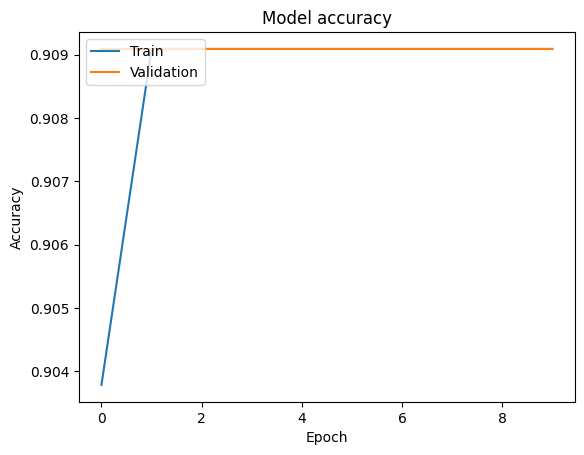

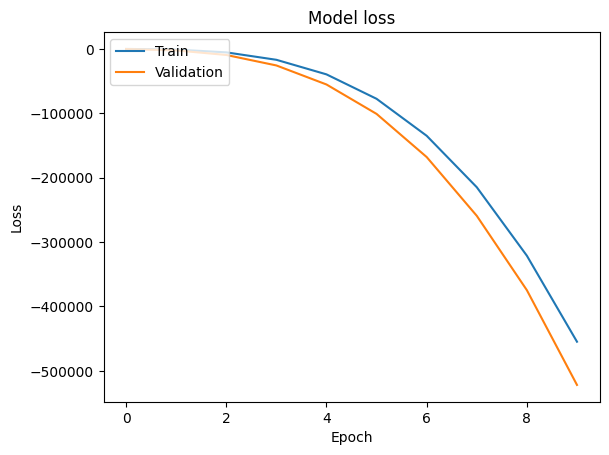

69/69 [==============================] - 3s 39ms/step - loss: -521538.5625 - accuracy: 0.9091
Test accuracy: 0.9090909361839294


In [7]:

#  modéle CNN

# Définir la forme des données d'entrée
input_shape = df_train_normalized.shape[1]

# Créer un modèle CNN simple
model = models.Sequential([
    layers.Reshape((input_shape, 1), input_shape=(input_shape,)),  # Ajouter une dimension pour le canal
    layers.Conv1D(32, 3, activation='relu'),  # Couche de convolution avec 32 filtres et fenêtre de taille 3
    layers.MaxPooling1D(2),  # Couche de pooling pour réduire la taille
    layers.Flatten(),  # Aplatir les données pour les passer à une couche dense
    layers.Dense(64, activation='relu'),  # Couche dense avec 64 neurones
    layers.Dense(1, activation='sigmoid')  # Couche de sortie avec une seule unité et activation sigmoïde
   ])

# Compiler le modèle
model.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(df_train_normalized, df_train_concat['source_type'], epochs=10, batch_size=125, validation_data=(df_val_normalized, df_val_concat['source_type']))

# Afficher l'historique de l'entraînement
print(history.history.keys())

# Entraîner le modèle
#history = model.fit(df_train_normalized, df_train_concat['source_type'], epochs=10, batch_size=32, validation_data=(df_val_normalized, df_val_concat['source_type']))

# Afficher l'historique de l'entraînement
#print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(df_test_normalized, df_test_concat['source_type'])
print('Test accuracy:', test_acc)

In [38]:

# Autre proposition pour le CNN

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F

# Définir la forme des données d'entrée
input_shape = df_train_normalized.shape[1]

# Créer un modèle CNN simple en utilisant PyTorch
class SimpleCNN(nn.Module):
    def __init__(self, input_shape):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3)  # Correction des dimensions de la couche de convolution
        self.pool = nn.MaxPool1d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * ((input_shape - 2) // 2), 64)  # Ajustement en conséquence de la taille de la couche dense
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Créer une instance du modèle
model = SimpleCNN(input_shape)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
my_optimizer = optim.SGD(model.parameters(), lr=0.1)

# Convertir les données en torch.Tensor
X_train = torch.tensor(df_train_normalized.values, dtype=torch.float32)
y_train = torch.tensor(df_train_concat['source_type'].values, dtype=torch.long)
X_val = torch.tensor(df_val_normalized.values, dtype=torch.float32)
y_val = torch.tensor(df_val_concat['source_type'].values, dtype=torch.long)
X_test = torch.tensor(df_test_normalized.values, dtype=torch.float32)
y_test = torch.tensor(df_test_concat['source_type'].values, dtype=torch.long)

# Créer des datasets à partir de vos données normalisées et cibles
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Créer des DataLoader pour vos datasets
batch_size = 125
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Entraîner le modèle
epochs = 10
for epoch in range(epochs):
    for inputs, labels in train_loader:
        my_optimizer.zero_grad()  # Réinitialiser les gradients
        outputs = model(inputs.unsqueeze(1))  # Ajouter une dimension pour le canal
        loss = criterion(outputs, labels)  # Calculer la perte
        loss.backward()  # Rétropropagation
        my_optimizer.step()  # Mettre à jour les poids

    # Évaluation sur l'ensemble de validation
    with torch.no_grad():
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        for inputs, labels in val_loader:
            outputs_val = model(inputs.unsqueeze(1))  # Ajouter une dimension pour le canal
            val_loss += criterion(outputs_val, labels)
            _, predicted = torch.max(outputs_val, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
        
        val_accuracy = correct_val / total_val
        print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Évaluer le modèle sur l'ensemble de test
test_loss = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs_test = model(inputs.unsqueeze(1))  # Ajouter une dimension pour le canal
        test_loss += criterion(outputs_test, labels)
        _, predicted = torch.max(outputs_test, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = correct_test / total_test
print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10, Validation Loss: 0.3499, Validation Accuracy: 0.9086
Epoch 2/10, Validation Loss: 0.3522, Validation Accuracy: 0.9086
Epoch 3/10, Validation Loss: 0.3440, Validation Accuracy: 0.9086
Epoch 4/10, Validation Loss: 0.3483, Validation Accuracy: 0.9091
Epoch 5/10, Validation Loss: 0.3484, Validation Accuracy: 0.9091
Epoch 6/10, Validation Loss: 0.3473, Validation Accuracy: 0.9091
Epoch 7/10, Validation Loss: 0.3462, Validation Accuracy: 0.9091
Epoch 8/10, Validation Loss: 0.3447, Validation Accuracy: 0.9091
Epoch 9/10, Validation Loss: 0.3426, Validation Accuracy: 0.9091
Epoch 10/10, Validation Loss: 0.3414, Validation Accuracy: 0.9091
Test Loss: 0.3466, Test Accuracy: 0.9091
